In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import json

plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('legend', fontsize=15)
plt.rc('figure', titlesize=20)

# Positions of RF Center 
The center of the quantum region is axial position = 0

In [4]:
filename = 'rf_center_phoenix.h5'
with h5py.File(filename, 'r') as fh:
    yz_index = np.array(fh['yz_index'])
    yz_um = np.array(fh['yz_um'])
    xs_um = np.array(fh['xs_um'])

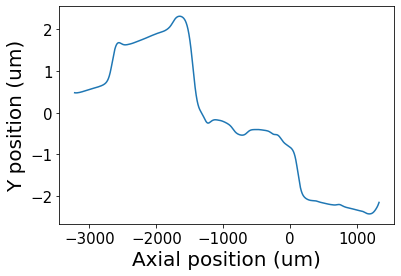

In [6]:
y_um = yz_um[0]
z_um = yz_um[1]
plt.plot(xs_um, y_um)
plt.xlabel('Axial position (um)')
plt.ylabel('Y position (um)')
plt.savefig('Fig2_ypos.png', dpi=300, bbox_inches='tight')

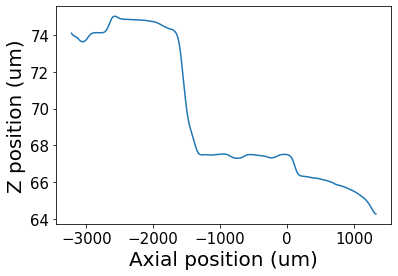

In [7]:
plt.plot(xs_um, z_um)
plt.xlabel('Axial position (um)')
plt.ylabel('Z position (um)')
plt.savefig('Fig2_zpos.png', dpi=300, bbox_inches='tight')

# Plot axial potential

In [8]:
from trap_dc import potentials
potential = potentials.Potential.import_64('/Users/sunke/Desktop/DukeLab/Code/DCsolution/trap_dc-master/scripts/RS1394_coarse.bin')

In [9]:
dir(potential)

['_Potential__init_alias',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'data',
 'electrode_index',
 'electrode_names',
 'electrodes',
 'get_cache',
 'import_64',
 'import_v0',
 'import_v1',
 'nx',
 'ny',
 'nz',
 'origin',
 'stride',
 'x_axis_to_index',
 'x_index_to_axis',
 'y_axis_to_index',
 'y_index_to_axis',
 'z_axis_to_index',
 'z_index_to_axis']

In [10]:
potential.data.shape

(92, 4551, 9, 16)

In [11]:
data_quantum_region = []
for key in potential.electrode_index.keys():
    if key[0] == 'Q':
        data_quantum_region.append(potential.data[potential.electrode_index[key]])
data_quantum_region = np.array(data_quantum_region)
data_quantum_region.shape

(66, 4551, 9, 16)

### If the potential is loaded from an existing file

In [18]:
### Load trap potential 
f = open("solutions/Phoenix_2_m35.txt", "r")
names = list(f.readline().split("\t"))
values = list(f.readline().split("\t"))
f.close()

In [19]:
res_sol = {names[i]: values[i] for i in range(len(names))}
res_sol_quantum_region = {}
for key in res_sol.keys():
    if key[0] == 'Q':
        res_sol_quantum_region[key] = res_sol[key]
trap_solution = np.array([float(i) for i in res_sol_quantum_region.values()])
trap_solution[46:48] = 0
print('Trap solution is: ', trap_solution)

Trap solution is:  [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.42085494  0.42085496  0.41334873  0.42084935
 -0.09228172 -0.03600932 -0.09799179 -0.12301655 -0.09240127 -0.03591382
  0.4208551   0.4208551   0.4208551   0.4208551   0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.4208532   0.39520241 -0.42085505 -0.42085506
 -0.4208551  -0.4208551  -0.4208551  -0.4208551   0.42085467  0.39856592
  0.          0.          0.          0.          0.          0.        ]


In [20]:
### Load compensation
f = open("solutions/global_adjust_2_m35.txt", "r")
data = f.readlines()
f.close()

In [21]:
comp_solution = 0.0
comp_values = {'dz': 0.0, 'dy': 0.0, 'dx':0.00, 'yz':0.0, 'z2':0.00, 'x2':0.0, 'x3':0, 'x4':0}
comp_idx = {'dz': 82, 'dy':83, 'dx':84, 'yz':85, 'z2':86, 'x2':87, 'x3':154, 'x4':155}
for item in comp_values.keys():
    res = np.array([float(dt) for dt in data[comp_idx[item]].split('\t')])
    comp_solution += res * comp_values[item]
comp_solution

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [22]:
entire_solution = trap_solution + comp_solution
# entire_solution = trap_solution
entire_solution

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.42085494,
        0.42085496,  0.41334873,  0.42084935, -0.09228172, -0.03600932,
       -0.09799179, -0.12301655, -0.09240127, -0.03591382,  0.4208551 ,
        0.4208551 ,  0.4208551 ,  0.4208551 ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.4208532 ,  0.39520241, -0.42085505, -0.42085506, -0.4208551 ,
       -0.4208551 , -0.4208551 , -0.4208551 ,  0.42085467,  0.39856592,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

### Plot the potential

In [23]:
real_potential = 0
for i in range(len(entire_solution)):
    real_potential += entire_solution[i]*data_quantum_region[i]
real_potential.shape

(4551, 9, 16)

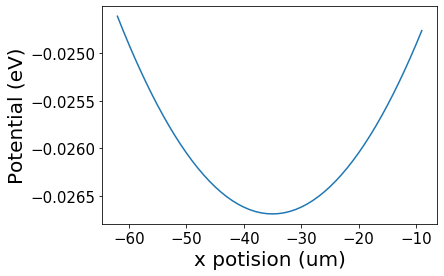

In [25]:
x_idx = np.arange(real_potential.shape[0])
plot_range = 27
sol_pos = 35
plot_center = 3045-(sol_pos-175)
plt.plot(potential.x_index_to_axis(x_idx)[(plot_center-plot_range):(plot_center+plot_range)]*1000, 
         real_potential[(plot_center-plot_range):(plot_center+plot_range), 4, 10])
plt.xlabel('x potision (um)')
plt.ylabel('Potential (eV)')
plt.savefig('Fig2_xpotential.png', dpi=300, bbox_inches='tight')

Text(0, 0.5, 'Potential (V/V)')

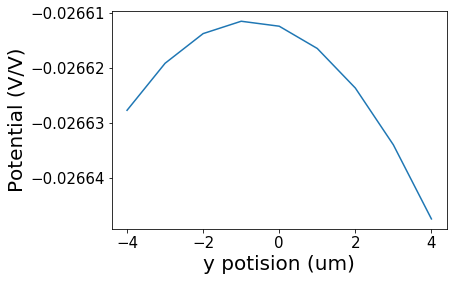

In [29]:
y_idx = np.arange(real_potential.shape[1])
plt.plot(potential.y_index_to_axis(y_idx)*1000, real_potential[plot_center, :, 3])
plt.xlabel('y potision (um)')
plt.ylabel('Potential (V/V)')

Text(0, 0.5, 'Potential (V/V)')

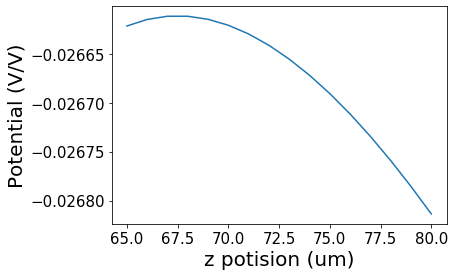

In [30]:
z_idx = np.arange(real_potential.shape[2])
plt.plot(potential.z_index_to_axis(z_idx)*1000, real_potential[plot_center, 3, :])
plt.xlabel('z potision (um)')
plt.ylabel('Potential (V/V)')

## 2D colormap plot

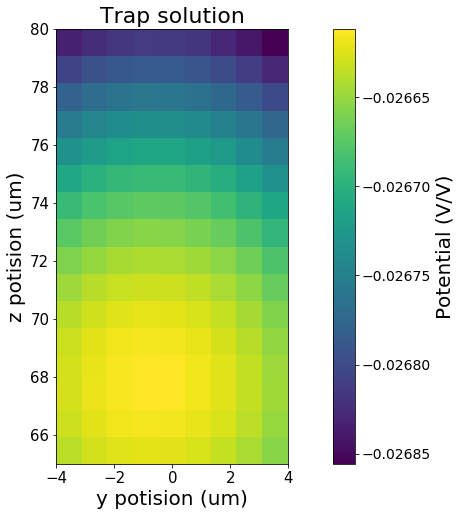

In [40]:
from mpl_toolkits.mplot3d import Axes3D  
x = potential.x_index_to_axis(x_idx)[(plot_center-plot_range):(plot_center+plot_range)]*1000
y = potential.y_index_to_axis(y_idx)*1000
z = potential.z_index_to_axis(z_idx)*1000

# Define the function for the colormap
p_yz = real_potential[plot_center, :, :].transpose()

fig = plt.figure(figsize = (16,8))
# Create a 2D colormap plot
plt.imshow(p_yz, extent=(y.min(), y.max(), z.min(), z.max()), origin='lower', cmap='viridis')

# Add colorbar
cbar = plt.colorbar(label='Potential (V/V)')
cbar.ax.tick_params(labelsize=14)

# Add labels to x and y axes
plt.xlabel('y potision (um)', fontsize=20)
plt.ylabel('z potision (um)', fontsize=20)

# Add title
plt.title('Trap solution', fontsize=22)
plt.savefig('Fig2_yz.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

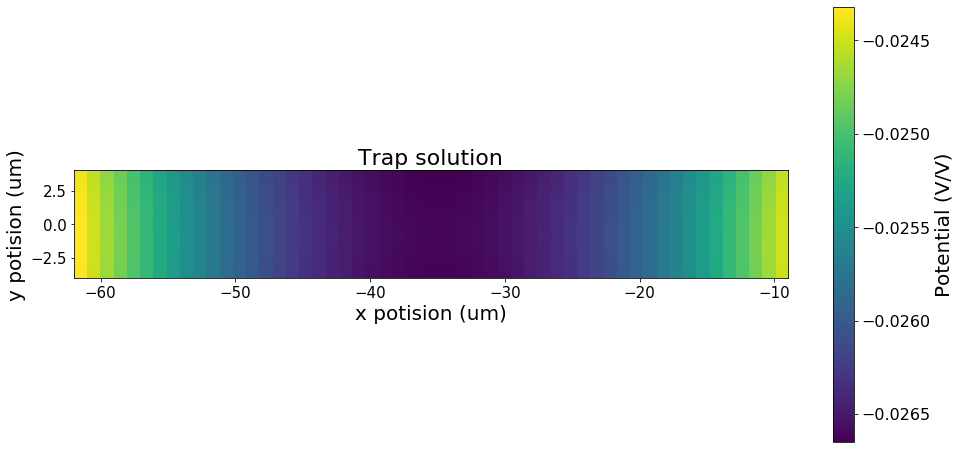

In [41]:
from mpl_toolkits.mplot3d import Axes3D  
x = potential.x_index_to_axis(x_idx)[(plot_center-plot_range):(plot_center+plot_range)]*1000
y = potential.y_index_to_axis(y_idx)*1000
z = potential.z_index_to_axis(z_idx)*1000

# Define the function for the colormap
p_xy = real_potential[(plot_center-plot_range):(plot_center+plot_range), :, 3].transpose()

fig = plt.figure(figsize = (16,8))
# Create a 2D colormap plot
plt.imshow(p_xy, extent=(x.min(), x.max(), y.min(), y.max()), origin='lower', cmap='viridis')

# Add colorbar
cbar = plt.colorbar(label='Potential (V/V)')
cbar.ax.tick_params(labelsize=16)

# Add labels to x and y axes
plt.xlabel('x potision (um)', fontsize=20)
plt.ylabel('y potision (um)', fontsize=20)

# Add title
plt.title('Trap solution', fontsize=22)

plt.savefig('Fig2_xy.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()


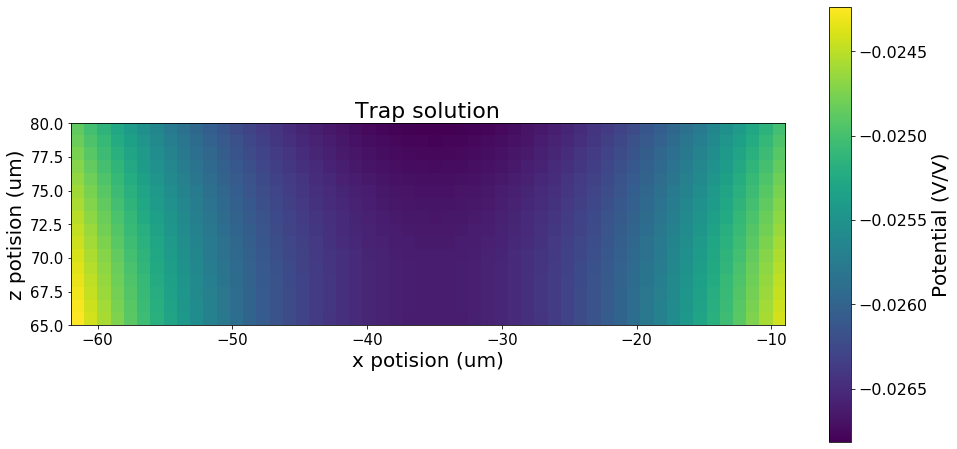

In [42]:
from mpl_toolkits.mplot3d import Axes3D  
x = potential.x_index_to_axis(x_idx)[(plot_center-plot_range):(plot_center+plot_range)]*1000
y = potential.y_index_to_axis(y_idx)*1000
z = potential.z_index_to_axis(z_idx)*1000

# Define the function for the colormap
p_xz = real_potential[(plot_center-plot_range):(plot_center+plot_range), 3, :].transpose()

fig = plt.figure(figsize = (16,8))
# Create a 2D colormap plot
plt.imshow(p_xz, extent=(x.min(), x.max(), z.min(), z.max()), origin='lower', cmap='viridis')

# Add colorbar
cbar = plt.colorbar(label='Potential (V/V)')
cbar.ax.tick_params(labelsize=16)

# Add labels to x and y axes
plt.xlabel('x potision (um)', fontsize=20)
plt.ylabel('z potision (um)', fontsize=20)

# Add title
plt.title('Trap solution', fontsize=22)
plt.savefig('Fig2_xz.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()


In [218]:
e = 1.60217663e-19
kb = 1.380649e-23
n = 5
h = 6.62607015e-34
nu = 2e6
T_rt = 300
T_ion = n*h*nu/kb
print('Ion temperature is '+str(T_ion)+' K')
V_rt = kb*T_rt/e
V_ion = kb*T_ion/e
print('Room temp Potential (V) is:'+str(V_rt)+'V')
print('Ion temp Potential (V) is:'+str(V_ion)+'V')
V_set = 4e-6
T_set = e*V_set/kb
print('Set Potential barrier temperature is is:'+str(T_set)+'K')

Ion temperature is 0.0004799243073366221 K
Room temp Potential (V) is:0.02585199985097773V
Ion temp Potential (V) is:4.135667707248982e-08V
Set Potential barrier temperature is is:0.04641807237031279K


### Plot the compensation solutions

In [54]:
comp_solution_temp = 0.0

comp_idx = {'dz': 81, 'dy':82, 'dx':83, 'yz':84, 'z2':85, 'x2':86, 'x3':87}

comp_solution_temp = np.array([float(dt) for dt in data[comp_idx['x2']].split('\t')])
# comp_solution_temp = solutions['x3']/1000

comp_potential = 0
for i in range(len(comp_solution_temp)):
    comp_potential += comp_solution_temp[i]*data_quantum_region[i]
comp_potential.shape

(4551, 9, 16)

Text(0, 0.5, 'Potential (V/V)')

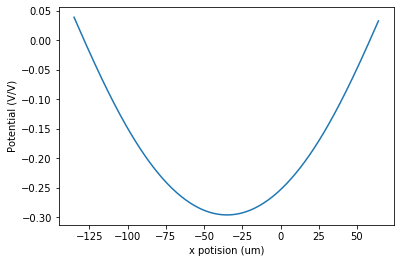

In [64]:
x_idx = np.arange(comp_potential.shape[0])
plot_range = 100
sol_pos = 35
plot_center = 3045-(sol_pos-175)
plt.plot(potential.x_index_to_axis(x_idx)[(plot_center-plot_range):(plot_center+plot_range)]*1000, 
         comp_potential[(plot_center-plot_range):(plot_center+plot_range), 3, 3]) 
# y_idx = 3: y = -1.00um, z_idx = 3: z = 68um, x_idx = 3045: x = -175um
plt.xlabel('x potision (um)')
plt.ylabel('Potential (V/V)')

Text(0, 0.5, 'Potential (V/V)')

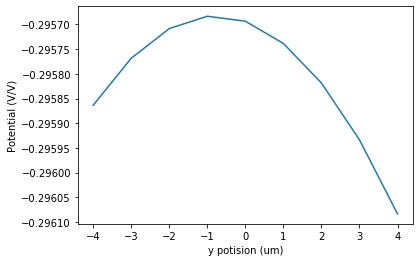

In [65]:
y_idx = np.arange(comp_potential.shape[1])
plt.plot(potential.y_index_to_axis(y_idx)*1000, comp_potential[plot_center, :, 3])
plt.xlabel('y potision (um)')
plt.ylabel('Potential (V/V)')

Text(0, 0.5, 'Potential (V/V)')

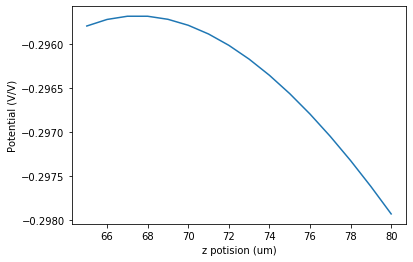

In [66]:
z_idx = np.arange(comp_potential.shape[2])
plt.plot(potential.z_index_to_axis(z_idx)*1000, comp_potential[plot_center, 3, :])
plt.xlabel('z potision (um)')
plt.ylabel('Potential (V/V)')